In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
mnase = pd.read_hdf('data/mnase_seq_merged_sampled.h5.z')

In [3]:
orfs = pd.read_csv('data/orfs_cd_paper_dataset.csv').set_index('orf_name')

In [4]:
mnase_0 = mnase[mnase.time == 0.0]

In [5]:
gene = orfs.loc[orfs.index.values[10]]

In [6]:
from src.vit_img_gen import ViTImgGen

len_cuts = [30, 80, 130, 201]

cuts = len(len_cuts)-1 # 3
window = 1024

img_height = 96
img_width = 512

patch_size = img_height // cuts
sublength_resize_height = patch_size # times 3 vertical patches of height

vit_gen = ViTImgGen(mnase_0, window, sublength_resize_height, len_cuts,
                    img_width, patch_size)


In [8]:
img, scaled_img, smoothed, img_slices = vit_gen.get_mnase_img(gene)

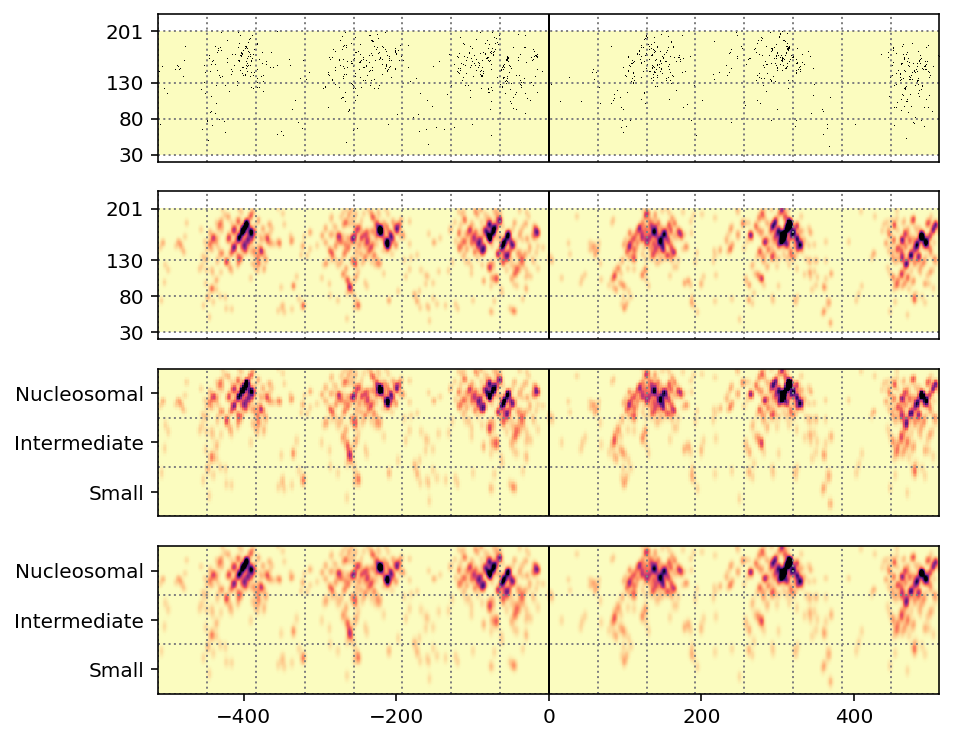

In [15]:
vit_gen.plot_resized_img()